* Q1-PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS


In [1]:
# IMPORT LIBRARIES 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential # sequential use for one nueron to go second not third or fourth
from keras.layers import Dense      # Dense mean every neuron connect ot another neuron


In [11]:
# UPLOAD DATA 
df=pd.read_csv('forestfires.csv')
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [13]:
#  DATA SIZE
df.shape

(517, 31)

In [14]:
# DROP TWO COLUMNS  'MONTH' AND 'DAY'
df1=df.drop(columns=['month','day'],axis=1)
df1.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,small


In [17]:
# APPLY ENCODER TECNIQUE TO CONVERT STRING TO DIGIT
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

df1[['size_category']]=df1[['size_category']].apply(label_encoder.fit_transform)
df1            # here 0 mean small area 1 means big area 

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1


<AxesSubplot:>

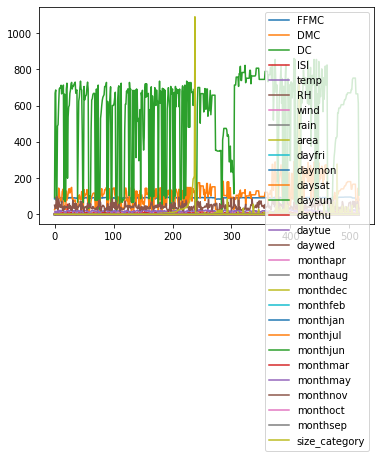

In [18]:
# Data visualization 
df1.plot()

<AxesSubplot:ylabel='Frequency'>

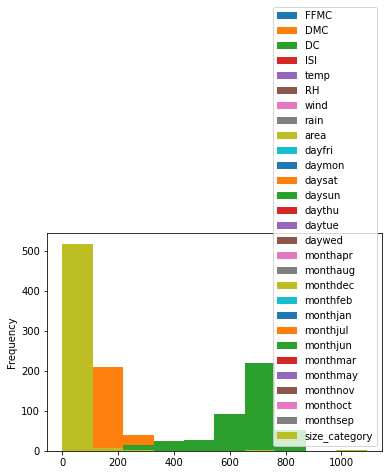

In [19]:
df1.plot(kind='hist')

<AxesSubplot:>

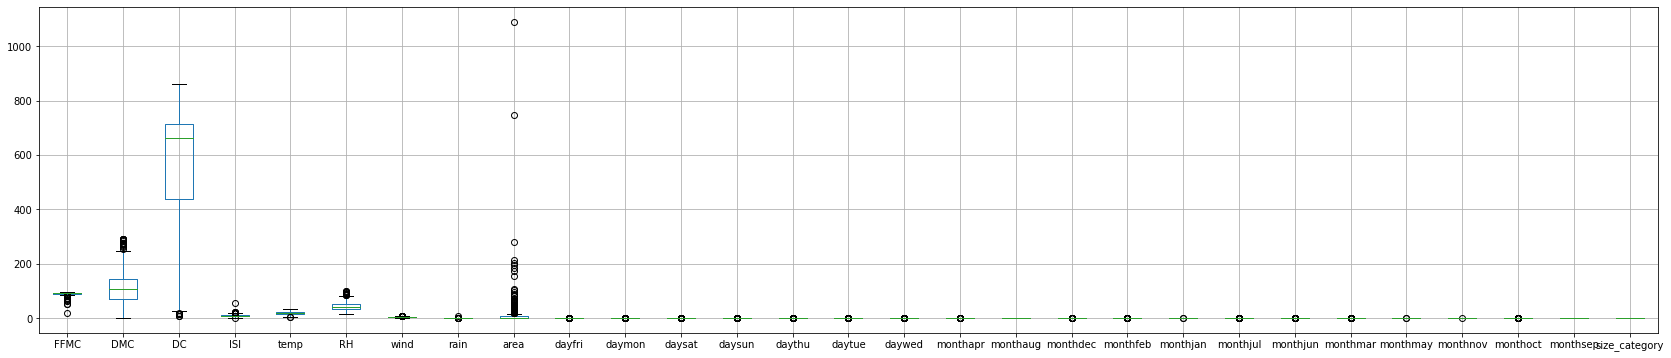

In [27]:
plt.figure(figsize=(29,6))
df1.boxplot()


In [34]:
# split into input (X) and output (Y) variables
x = df1.iloc[:, :28]
y = df1.iloc[:, 28]

In [40]:
# create model
model = Sequential()
model.add(Dense(32, input_dim=28,  activation='relu'))         #1st layer have 32 neuron  
                                                               # here 29= number of indepdent variable
model.add(Dense(30,  activation='relu'))                        #2nd layer
model.add(Dense(1, activation='sigmoid'))                      #3rd layer or op layer

In [41]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) # here loss is 
# function always less loss , optimezer 'adam' is best optimizer we have studied Gradient Decent it is
# also is one optimizer, metrics it will give accuracy for every epoch

In [42]:
# Fit the model
history = model.fit(x, y, validation_split=0.25, epochs=200, batch_size=10) # here validation_split
# 25% test data , 75% training data , epoch = 200 , batch_size =10, mean we will take recodrs  10
#in one time only

Epoch 1/200
39/39 [==============================] - 4s 23ms/step - loss: 3.5915 - accuracy: 0.5711 - val_loss: 1.1258 - val_accuracy: 0.5615
Epoch 2/200
39/39 [==============================] - 0s 5ms/step - loss: 0.7480 - accuracy: 0.7390 - val_loss: 0.5223 - val_accuracy: 0.8231
Epoch 3/200
39/39 [==============================] - 0s 5ms/step - loss: 0.4549 - accuracy: 0.8475 - val_loss: 0.3880 - val_accuracy: 0.8462
Epoch 4/200
39/39 [==============================] - 0s 5ms/step - loss: 0.4059 - accuracy: 0.8475 - val_loss: 0.5815 - val_accuracy: 0.7231
Epoch 5/200
39/39 [==============================] - 0s 6ms/step - loss: 0.5085 - accuracy: 0.8346 - val_loss: 0.3376 - val_accuracy: 0.8769
Epoch 6/200
39/39 [==============================] - 0s 8ms/step - loss: 0.2925 - accuracy: 0.8760 - val_loss: 0.2851 - val_accuracy: 0.9000
Epoch 7/200
39/39 [==============================] - 1s 15ms/step - loss: 0.1801 - accuracy: 0.9328 - val_loss: 0.4317 - val_accuracy: 0.7692
Epoch 8/200

39/39 [==============================] - 0s 5ms/step - loss: 0.0184 - accuracy: 0.9922 - val_loss: 0.2090 - val_accuracy: 0.9462
Epoch 116/200
39/39 [==============================] - 0s 5ms/step - loss: 0.0641 - accuracy: 0.9767 - val_loss: 0.0600 - val_accuracy: 0.9615
Epoch 117/200
39/39 [==============================] - 0s 7ms/step - loss: 0.0705 - accuracy: 0.9793 - val_loss: 0.0538 - val_accuracy: 0.9769
Epoch 118/200
39/39 [==============================] - 0s 9ms/step - loss: 0.0421 - accuracy: 0.9845 - val_loss: 0.2680 - val_accuracy: 0.9462
Epoch 119/200
39/39 [==============================] - 0s 8ms/step - loss: 0.0901 - accuracy: 0.9742 - val_loss: 0.4014 - val_accuracy: 0.9231
Epoch 120/200
39/39 [==============================] - 0s 7ms/step - loss: 0.2698 - accuracy: 0.9535 - val_loss: 0.1603 - val_accuracy: 0.9538
Epoch 121/200
39/39 [==============================] - 0s 7ms/step - loss: 0.0956 - accuracy: 0.9716 - val_loss: 0.2260 - val_accuracy: 0.9462
Epoch 122/200

In [43]:
model.metrics_names

['loss', 'accuracy']

In [45]:
# MODEL ACCURACY 
scores = model.evaluate(x,y)
scores  # this give loss and accuracy value 

17/17 [==============================] - 0s 5ms/step - loss: 0.0836 - accuracy: 0.9787


[0.0835992693901062, 0.978723406791687]

In [46]:
# Visualize training history

# list all data in history
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

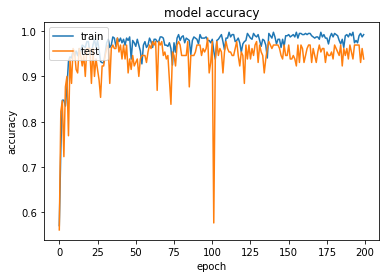

In [47]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

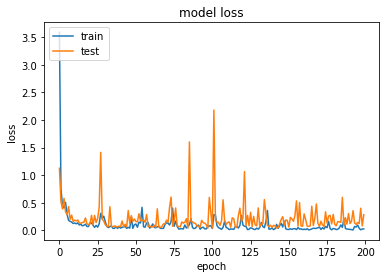

In [48]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

************************************

*******************************

Q2-The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine. 

The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.

Problem statement: predicting turbine energy yield (TEY) using ambient variables as features.

Attribute Information:

The explanations of sensor measurements and their brief statistics are given below.

* Variable (Abbr.) Unit Min Max Mean
* Ambient temperature (AT) C â€“6.23 37.10 17.71
* Ambient pressure (AP) mbar 985.85 1036.56 1013.07
* Ambient humidity (AH) (%) 24.08 100.20 77.87
* Air filter difference pressure (AFDP) mbar 2.09 7.61 3.93
* Gas turbine exhaust pressure (GTEP) mbar 17.70 40.72 25.56
* Turbine inlet temperature (TIT) C 1000.85 1100.89 1081.43
* Turbine after temperature (TAT) C 511.04 550.61 546.16
* Compressor discharge pressure (CDP) mbar 9.85 15.16 12.06
* Turbine energy yield (TEY) MWH 100.02 179.50 133.51
* Carbon monoxide (CO) mg/m3 0.00 44.10 2.37
* Nitrogen oxides (NOx) mg/m3 25.90 119.91 65.29

In [2]:
# UPLOAD DATA
df2=pd.read_csv('gas_turbines.csv')
df2

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


<AxesSubplot:>

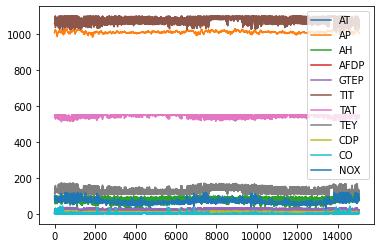

In [3]:
#DATA VISUALIZATION 
df2.plot()

<AxesSubplot:ylabel='Frequency'>

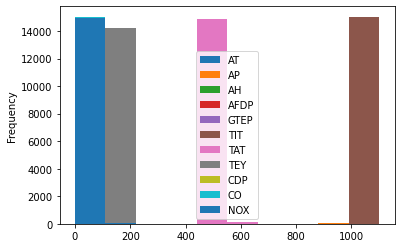

In [4]:
df2.plot(kind='hist')

<AxesSubplot:>

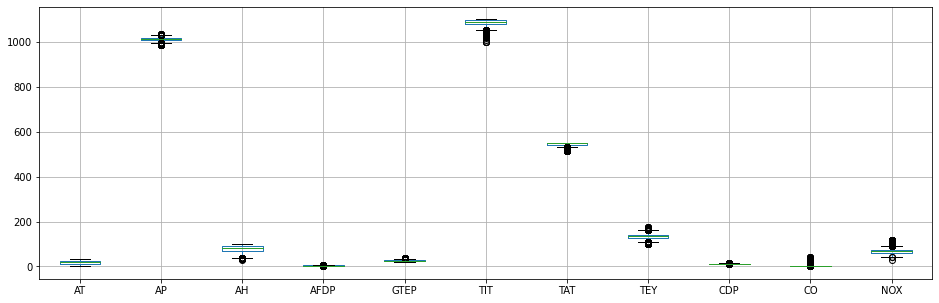

In [5]:
plt.figure(figsize=(16,5))
df2.boxplot()

In [6]:
# DATA STANDARDIZATION 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df3 = scaler.fit_transform(df2)
df3

array([[-1.4397781 , -0.82664395,  1.28143632, ..., -1.35733078,
         0.53201195,  1.3878449 ],
       [-1.44960109, -0.74864748,  1.30456402, ..., -1.36367619,
         0.56873344,  1.39300237],
       [-1.43472138, -0.68625031,  1.21908576, ..., -1.36095673,
         0.5529378 ,  1.36358566],
       ...,
       [-1.38626659, -1.07623263,  1.47697056, ..., -1.46792219,
         2.69592467,  2.17006209],
       [-1.42042259, -0.99823616,  1.44159024, ..., -1.42259784,
         1.9246834 ,  2.391165  ],
       [-1.43073409, -0.93583899,  1.33465179, ..., -1.37727349,
         1.35415028,  2.32153907]])

In [7]:
# MAKE DATA DATAFRAME AFTER STANDARDIZATION 
df3=pd.DataFrame(df3, columns= df2.columns[:]) # this convert in data frame and take column from orginal data 
df3.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,-1.439778,-0.826644,1.281436,-0.921232,-1.379101,-1.488376,0.585240,-1.231172,-1.357331,0.532012,1.387845
1,-1.449601,-0.748647,1.304564,-0.921495,-1.363528,-1.482325,0.585240,-1.229909,-1.363676,0.568733,1.393002
2,-1.434721,-0.686250,1.219086,-0.944385,-1.351309,-1.476275,0.568715,-1.230541,-1.360957,0.552938,1.363586
3,-1.413702,-0.623853,1.169060,-0.946884,-1.348194,-1.464173,0.583969,-1.229909,-1.356424,0.548933,1.382878
4,-1.368693,-0.545857,1.161883,-0.924389,-1.354663,-1.458123,0.582698,-1.229909,-1.350985,0.574179,1.348591


In [162]:
# DATA SPLITING INTO INDEPENDENT AND DEPENDENT(TARGET) VARIABLE 
y1 = df3['TEY']
x1 = df3.drop(['TEY'], axis=1)

In [175]:
# SPLITING DATA IN TRAIN AND TEST 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x1, y1, test_size=0.20, random_state=0)

In [176]:
# create model
model1 = Sequential()
model1.add(Dense(30, input_dim=10,  activation='relu'))         #1st layer have 32 neuron  
                                                               # here 29= number of indepdent variable
model1.add(Dense(25,  activation='relu'))                        #2nd layer
model1.add(Dense(20,  activation='relu'))                        #3nd layer
model1.add(Dense(18,  activation='relu'))                        #3nd layer
model1.add(Dense(15,  activation='relu'))                        #3nd layer

model1.add(Dense(1, activation='linear'))                      #4th layer or op layer


In [177]:
# Compile model
model1.compile(loss='mean_squared_error', optimizer='adam',metrics=['mae'] ) # here loss is 
# function always less loss , optimezer 'adam' is best optimizer we have studied Gradient Decent it is
# also is one optimizer

In [184]:
# Fit the model
history1 = model1.fit(X_train,y_train , validation_split=0.25, epochs=50, batch_size=10) 

Epoch 1/50
903/903 [==============================] - 3s 4ms/step - loss: 0.0023 - mae: 0.0334 - val_loss: 0.0014 - val_mae: 0.0275
Epoch 2/50
903/903 [==============================] - 3s 4ms/step - loss: 0.0018 - mae: 0.0307 - val_loss: 0.0014 - val_mae: 0.0277
Epoch 3/50
903/903 [==============================] - 3s 4ms/step - loss: 0.0019 - mae: 0.0312 - val_loss: 0.0019 - val_mae: 0.0318
Epoch 4/50
903/903 [==============================] - 3s 4ms/step - loss: 0.0018 - mae: 0.0307 - val_loss: 0.0019 - val_mae: 0.0321
Epoch 5/50
903/903 [==============================] - 4s 4ms/step - loss: 0.0016 - mae: 0.0292 - val_loss: 0.0014 - val_mae: 0.0278
Epoch 6/50
903/903 [==============================] - 4s 4ms/step - loss: 0.0016 - mae: 0.0291 - val_loss: 0.0014 - val_mae: 0.0272
Epoch 7/50
903/903 [==============================] - 3s 4ms/step - loss: 0.0016 - mae: 0.0289 - val_loss: 0.0017 - val_mae: 0.0314
Epoch 8/50
903/903 [==============================] - 7s 7ms/step - loss: 0.

In [185]:
# MODEL ACCURACY 
from sklearn.metrics import r2_score 
result=r2_score(model1.predict(X_test),y_test)
result

94/94 [==============================] - 0s 2ms/step


0.9989410935118438

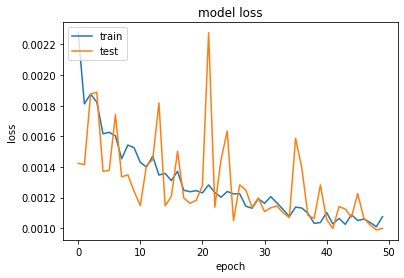

In [188]:
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()